## **CNN with MNIST Data**

In [59]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [60]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [61]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [62]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [63]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [64]:
X_train[5].shape

(28, 28)

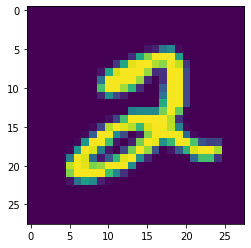

In [65]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [73]:
y_train[6]

1

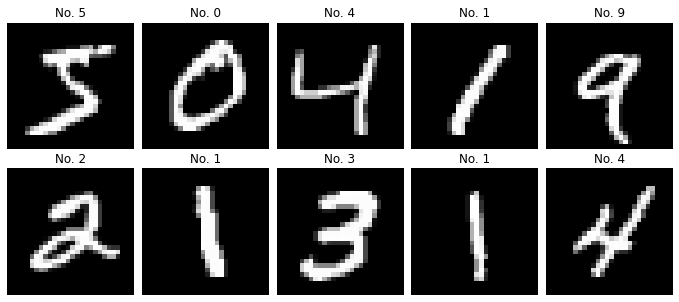

In [69]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [11]:
X_train[5].min()

0

In [12]:
X_train[5].max()

255

In [74]:
type(X_train)

numpy.ndarray

In [75]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [76]:
type(X_train)

numpy.ndarray

In [14]:
X_train[5].min()

0.0

In [15]:
X_train[5].max()

1.0

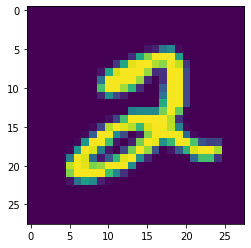

In [16]:
plt.imshow(X_train[5])

In [17]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [81]:
y_test.shape

(10000,)

In [20]:
from tensorflow.keras.utils import to_categorical

In [80]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [28]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1454 - accuracy: 0.9555 - val_loss: 0.0647 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0492 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0489 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0461 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0475 - val_accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0439 - val_ac

In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
model.history.history

{'loss': [0.14537596702575684,
  0.05242437496781349,
  0.032137513160705566,
  0.02213018201291561,
  0.014737758785486221,
  0.010472490452229977,
  0.009113229811191559,
  0.00528420927003026,
  0.00525438878685236],
 'accuracy': [0.9555166959762573,
  0.9839833378791809,
  0.9903500080108643,
  0.9928333163261414,
  0.9952666759490967,
  0.9967166781425476,
  0.9970499873161316,
  0.998283326625824,
  0.9982166886329651],
 'val_loss': [0.06465545296669006,
  0.049237269908189774,
  0.05096835643053055,
  0.04893728345632553,
  0.04613905027508736,
  0.04751788079738617,
  0.04392681643366814,
  0.05377175286412239,
  0.052216071635484695],
 'val_accuracy': [0.9790999889373779,
  0.9829999804496765,
  0.9836999773979187,
  0.9855999946594238,
  0.98580002784729,
  0.9865999817848206,
  0.9879000186920166,
  0.9866999983787537,
  0.9876999855041504]}

In [31]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.145376,0.955517,0.064655,0.9791
1,0.052424,0.983983,0.049237,0.9830
2,0.032138,0.990350,0.050968,0.9837
3,0.022130,0.992833,0.048937,0.9856
4,0.014738,0.995267,0.046139,0.9858


Text(0.5, 0, 'Epoch')

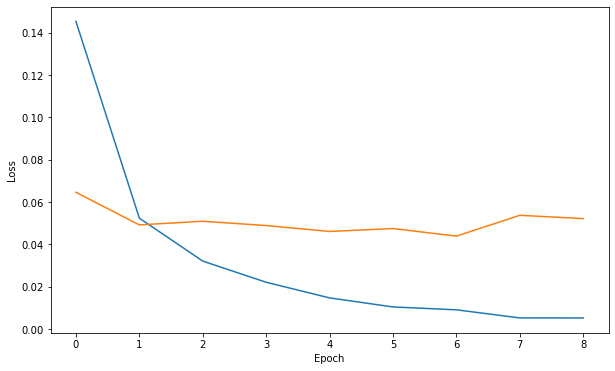

In [32]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

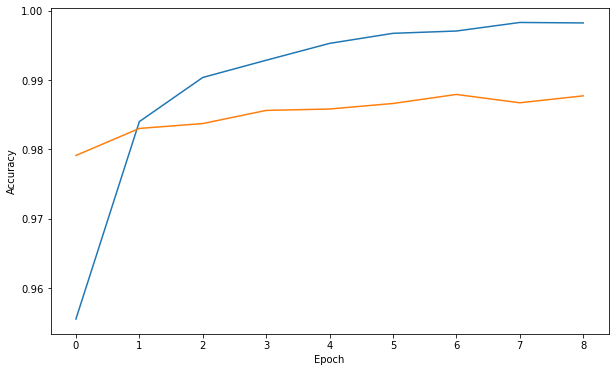

In [44]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

In [45]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9877
[0.052216071635484695, 0.9876999855041504]


In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
preds = model.predict(X_test)
preds

array([[2.6394827e-11, 1.8661326e-09, 1.4242867e-09, ..., 9.9999988e-01,
        1.3594269e-09, 1.0062447e-08],
       [3.3833952e-15, 6.4227339e-12, 1.0000000e+00, ..., 8.9266654e-19,
        1.9942507e-17, 1.8426258e-21],
       [2.5141642e-10, 9.9999988e-01, 1.4545988e-09, ..., 7.3975386e-09,
        4.9803033e-09, 5.5793929e-11],
       ...,
       [4.4371911e-21, 1.0245654e-16, 1.8817461e-19, ..., 4.5394007e-14,
        4.0658379e-12, 1.7604593e-11],
       [6.0089073e-16, 3.6165634e-19, 2.2399310e-17, ..., 4.0573858e-16,
        1.2951291e-10, 2.1015816e-13],
       [2.9371138e-14, 1.8988657e-18, 5.2181547e-18, ..., 1.0561836e-20,
        1.1880867e-15, 9.7591305e-20]], dtype=float32)

In [49]:
predictions= np.argmax(preds, axis=1)
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
print(confusion_matrix(y_test, predictions))

[[ 973    1    3    1    0    0    2    0    0    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   1    2 1020    0    1    0    1    6    0    1]
 [   0    0    2  998    0    5    0    1    2    2]
 [   0    0    1    0  969    0    1    0    0   11]
 [   1    0    1    5    0  882    3    0    0    0]
 [   5    2    0    1    1    2  947    0    0    0]
 [   1    1    4    1    0    0    0 1015    0    6]
 [   4    1    6    2    0    1    1    2  953    4]
 [   1    2    0    0    6    4    0    4    3  989]]


In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.052216071635484695
Test accuracy: 0.9876999855041504


In [53]:
my_number = X_test[0]
my_number

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

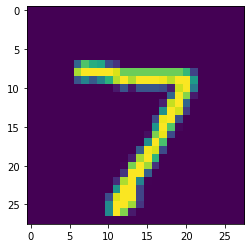

In [55]:
plt.imshow(my_number.reshape(28,28))

In [56]:
model.predict(my_number.reshape(1,28,28,1))

array([[2.6394676e-11, 1.8661290e-09, 1.4242812e-09, 7.9883293e-08,
        1.2727053e-10, 2.1564608e-12, 1.4477521e-19, 9.9999988e-01,
        1.3594217e-09, 1.0062408e-08]], dtype=float32)

In [57]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7], dtype=int64)

In [58]:
model.save("cnn-1.h5")